In [9]:
%config IPCompleter.greedy=True
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('data/MountEverest.csv')
X = np.array(data['distance'])
Y = np.array(data['height'])

In [11]:
print(len(X), max(X))

512 7803.262705711419


In [12]:
# X = np.array([0, 2, 3, 4])
# Y = np.array([4,1,6,1])

In [13]:
def poly_product(polynomials) -> np.poly:
    product = 1
    for polynomial in polynomials:
        product *= polynomial
    return product

In [14]:
def phi(x_samples:np.ndarray, i:int) -> np.float64:
    nominator = poly_product([np.poly1d([1, -x_sample]) for k, x_sample in enumerate(x_samples) if i != k])
    denominator = np.prod([x_samples[i] - x_sample for k, x_sample in enumerate(x_samples) if i != k])
    return nominator / denominator

In [15]:
def lagrange(x:np.ndarray, x_samples:np.ndarray, y_samples:np.ndarray) -> np.ndarray:
    phis = [phi(x_samples, i) for i,_ in enumerate(x_samples)]
    def evaluate(x:np.float64, phis:list, y_samples:np.ndarray) -> np.float64:
        return np.sum([y * phis[i](x) for i, y in enumerate(y_samples)])
    return np.array([evaluate(x_, phis, y_samples) for x_ in x])

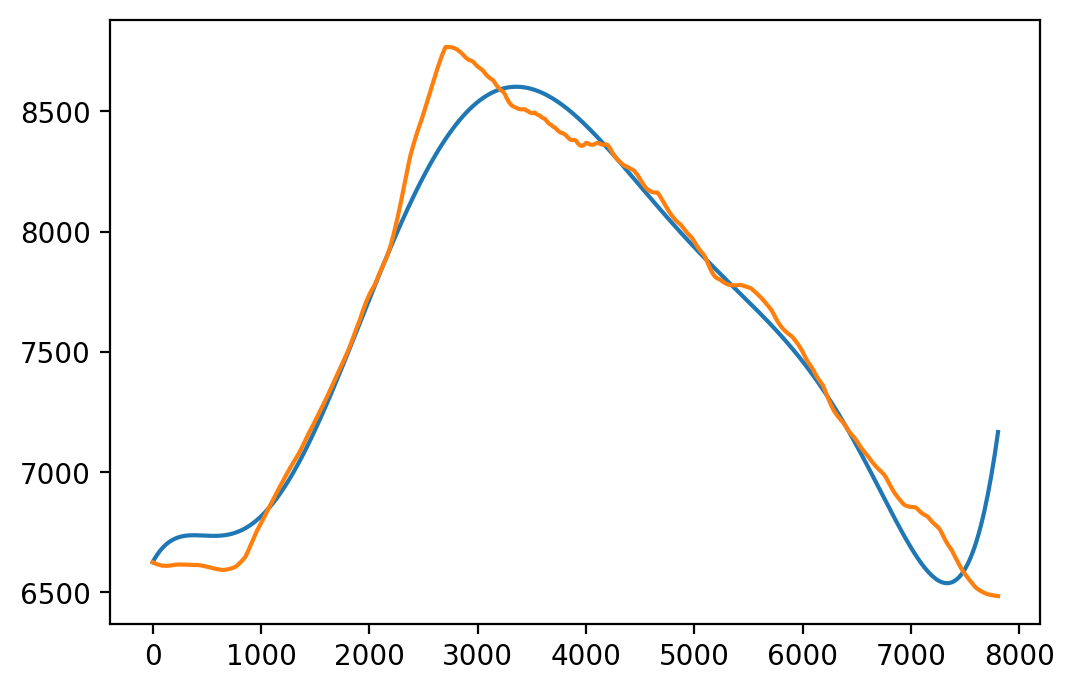

In [20]:

plt.figure(dpi=200)
l = lagrange(x, X[0::70], Y[0::70])
plt.plot(x, l)
plt.plot(X, Y)
plt.show()